In [1]:
import pickle
from custom_clss_and_fncs import * 
# Open the file in binary mode
with open('results/data/lista_de_grafos.pkl', 'rb') as file:
      
    # Call load method to deserialze
    list_of_graphs = pickle.load(file)


In [2]:
nx_G = nx.read_gpickle("results/data/nx_G.gpickle")
target_node = 'r0399'
producto_idx = list(nx_G.nodes()).index(target_node)



Train_graphs, Test_graphs = train_test_split(
            list_of_graphs,test_size=0.35,shuffle=True)


out_channels = 9
hidden_dim   = 9
num_layers   = 3
n_nodes      = list_of_graphs[0].num_nodes
loss_fun  = torch.nn.MSELoss()
modelo = regresor_GIN(target_node_idx = producto_idx,n_nodes = n_nodes, num_features = 1, 
                      out_channels = out_channels, hidden_dim =hidden_dim, 
                      num_layers=num_layers, dropout=.1).to('cpu') 

optimizer = torch.optim.Adam(modelo.parameters(),)

batch_size   = 10
num_samples  = 400
epochs       = 100

train_loader = make_loader(Train_graphs, batch_size,num_samples)
test_loader  = make_loader(Test_graphs, batch_size, num_samples = 200)
best_eval_weights, check_seen_y  = train_and_evaluate(optimizer,loss_fun, modelo, train_loader,test_loader,save_state_dict = True,
                                       epochs = epochs, batch_size=batch_size, verbose = True)

  1%|          | 1/100 [00:02<04:07,  2.50s/it]

NEW best min_total_loss_val 8.647173747420311 epoch: 0
best_evaluated_model.pt and state_dict_best_evaluated_model.pth overwritten


  2%|▏         | 2/100 [00:03<02:16,  1.40s/it]

NEW best min_total_loss_val 7.987500563263893 epoch: 1
best_evaluated_model.pt and state_dict_best_evaluated_model.pth overwritten


  4%|▍         | 4/100 [00:04<01:24,  1.13it/s]

NEW best min_total_loss_val 7.576012045145035 epoch: 3
best_evaluated_model.pt and state_dict_best_evaluated_model.pth overwritten


 15%|█▌        | 15/100 [00:11<00:53,  1.60it/s]

NEW best min_total_loss_val 7.249451726675034 epoch: 14
best_evaluated_model.pt and state_dict_best_evaluated_model.pth overwritten


 21%|██        | 21/100 [00:14<00:49,  1.60it/s]

NEW best min_total_loss_val 6.791696086525917 epoch: 20
best_evaluated_model.pt and state_dict_best_evaluated_model.pth overwritten


100%|██████████| 100/100 [01:04<00:00,  1.55it/s]


<AxesSubplot:>

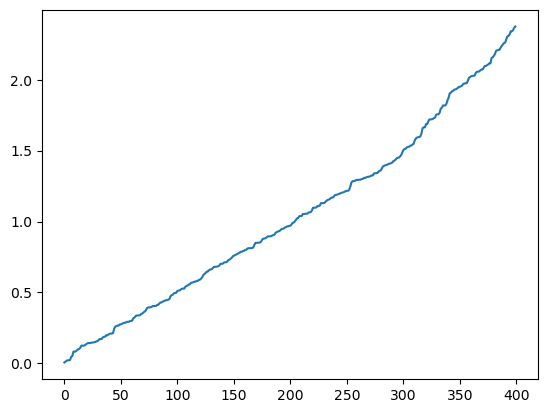

In [3]:
pd.Series(check_seen_y).sort_values(inplace=False).reset_index(drop=True).plot()
